In [1]:
import sys
from pathlib import Path

# Add the src directory to the Python path
project_path = Path().resolve().parent  # Get the parent directory of notebooks/
sys.path.append(str(project_path / 'src'))


In [2]:
import pandas as pd
from data_analyzer import DataAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


# Load the preprocessed data
df2 = pd.read_csv('../data/preprocessed_dataset4.csv')
df2.head()

,param_b,param_d,param_h2,param_r,param_h3,param_Dm,param_ts,param_S,IW,IW_after_3_months,...,m2_rand1,m2_rand2,m2_rand3,m2_rand4,m2_rand5,T1Gd_MRI,FLAIR_MRI,m2/m1 at the core,m2/m1 at the edge,random m2/m1
0,0.007583,0.011995,0.016905,0.77513,0.001358,0.049575,0.47649,0.39058,7.7,5.0,...,17.051298,11.466250,14.781244,17.051298,17.051298,3.318854,6.011855,3.609976,3.461021,3.271834
1,0.017364,0.214110,0.052564,0.64912,0.092466,0.011697,0.19718,0.38084,57.4,15.5,...,23.700744,23.336736,23.601960,23.676358,23.719638,24.697007,49.172917,8.249230,16.581663,9.219569
2,0.025704,0.228750,0.086792,0.44058,0.041428,0.082967,0.41771,0.18997,57.4,15.0,...,23.318321,22.113603,22.950901,23.249889,23.350797,29.909090,56.070952,15.506806,25.486101,16.091996
3,0.025496,0.207690,0.093530,0.66250,0.066799,0.043951,0.19588,0.26457,58.1,14.0,...,22.929723,23.212832,23.113538,22.974069,22.913368,25.347036,50.057759,8.000058,17.425125,9.198852
4,0.003470,0.023539,0.073731,0.60801,0.033812,0.023481,0.10858,0.13663,12.6,10.5,...,3.293029,1.353164,2.681827,3.293029,3.546935,3.954359,7.686673,3.847851,2.799928,3.193474


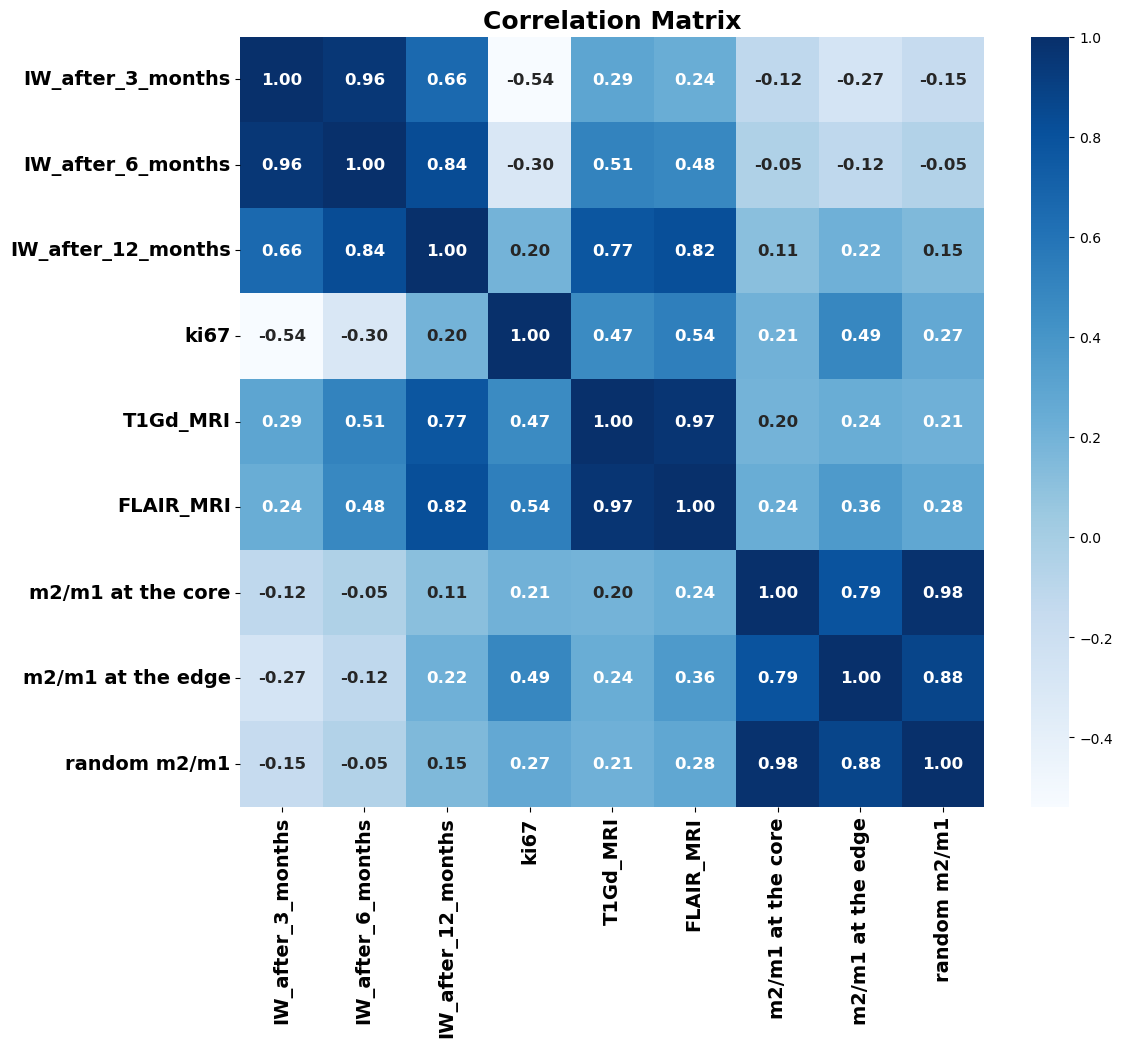

Features shape: (20000, 6)
IW after 12 months: 20000
IW after 3 months: 20000
Analyzing target: IW after 12 months


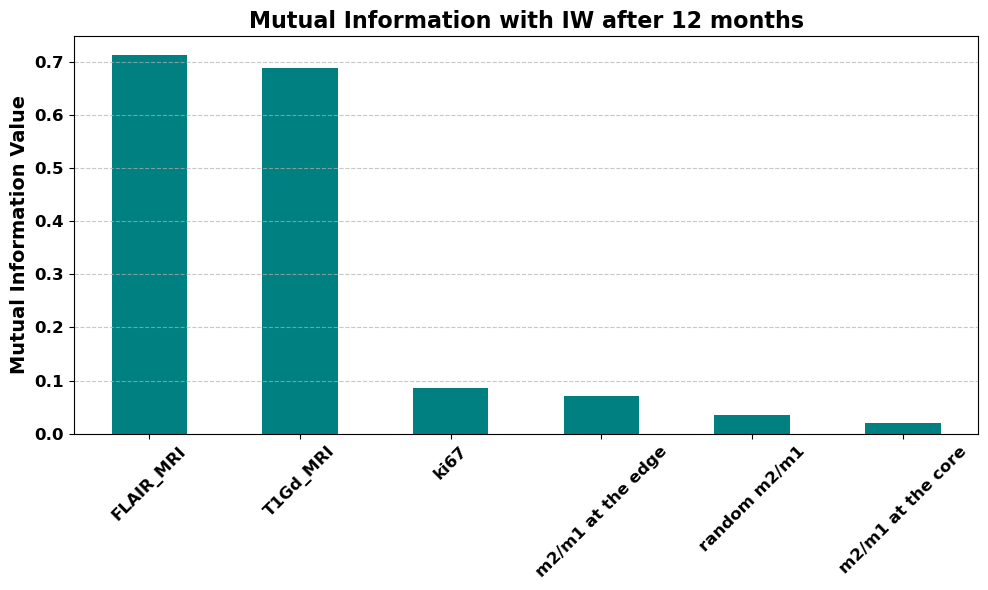

Analyzing target: IW after 3 months


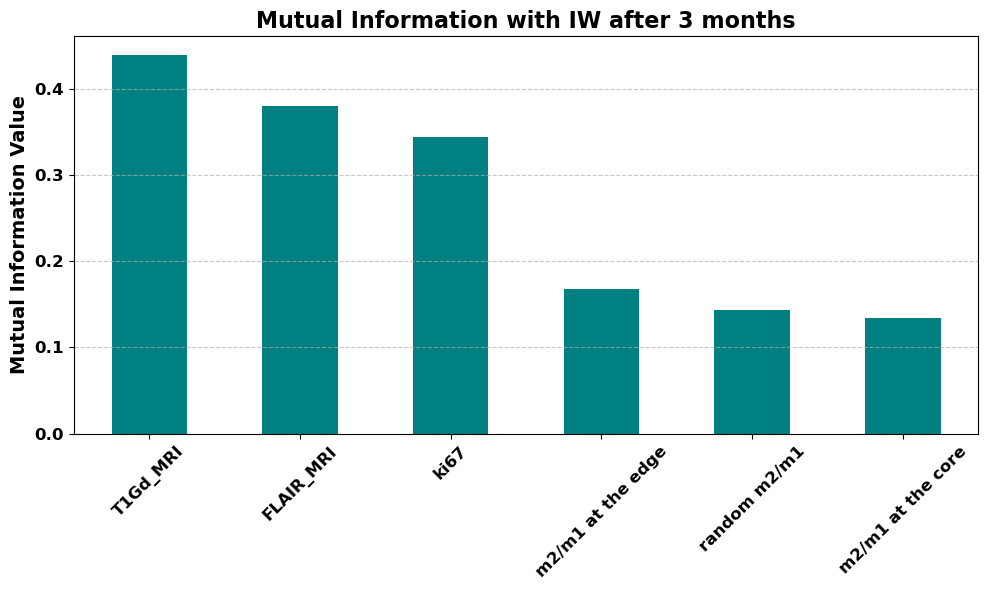

In [3]:
# Prepare the feature and target datasets
X_updated = df2.drop(columns=[
    "param_b", "param_d", "param_h2", "param_r", "param_h3", "param_Dm", "param_ts",
    "param_S", "IW", "m1_1", "m1_2", "m1_3", "m1_4", "m1_5", 
    "m2_1", "m2_2", "m2_3", "m2_4", "m2_5", "m1_rand1", "m1_rand2", "m1_rand3", "m1_rand4", 
    "m1_rand5", "m2_rand1", "m2_rand2", "m2_rand3", "m2_rand4", "m2_rand5"
])
Y = df2['IW_after_3_months'].values

# Initialize DataAnalyzer
analyzer = DataAnalyzer(X_updated)

# Analyze correlation matrix
correlation_matrix = analyzer.calculate_correlation_matrix(
    save_path='../data/correlation_matrix.pdf'
)


# Define targets
targets = {
    "IW after 12 months": df2['IW_after_12_months'].values,
    "IW after 3 months": df2['IW_after_3_months'].values,
}

# Define feature set
features = X_updated.drop(columns=["IW_after_3_months", "IW_after_6_months", "IW_after_12_months"], errors='ignore')

# Debug shapes of features and targets
print("Features shape:", features.shape)
for target_name, target in targets.items():
    print(f"{target_name}: {len(target)}")

# Analyze mutual information
colors = ['teal', 'teal']
for (target_name, target), color in zip(targets.items(), colors):
    print(f"Analyzing target: {target_name}")
    analyzer.calculate_and_plot_mutual_info(features, target, target_name, color)

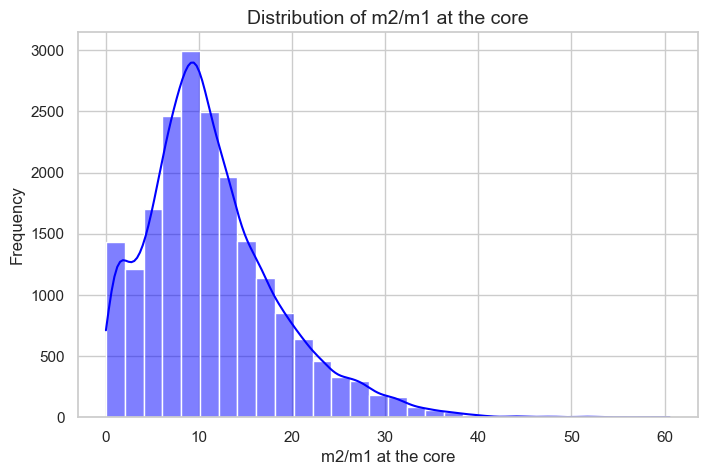

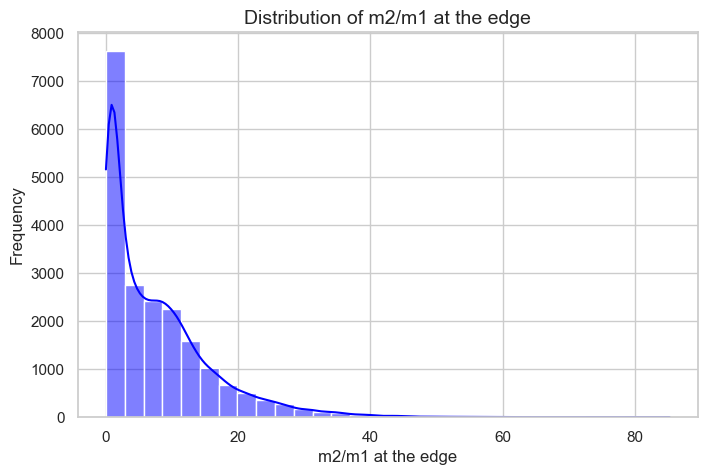

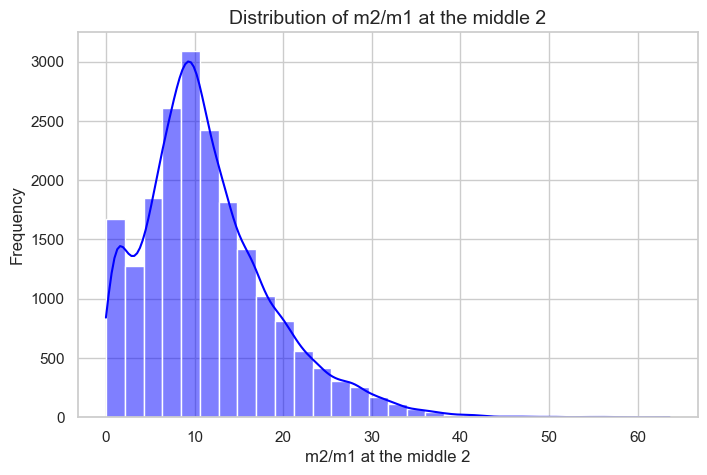

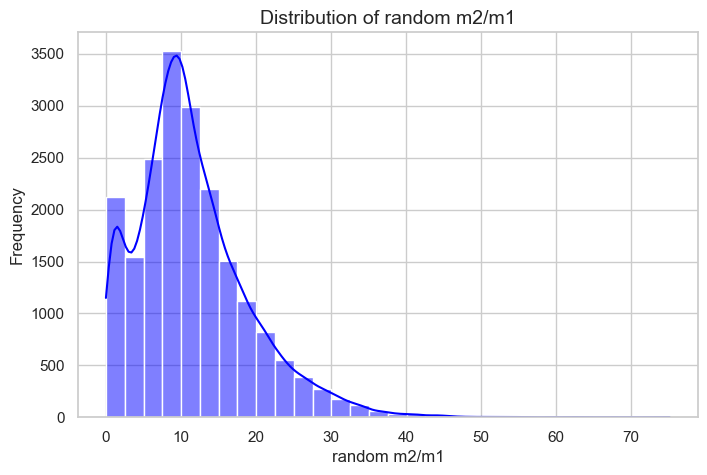

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df2 = pd.read_csv('../data/preprocessed_dataset.csv')




# List of features
#features = ['m2/m1 at the core', 'm2/m1 at the edge', 'random m2/m1']
features = ['m2/m1 at the core', 'm2/m1 at the edge', 'm2/m1 at the middle 2', 'random m2/m1']

# Set plot style
sns.set(style='whitegrid')

# Plot distributions
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df2[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

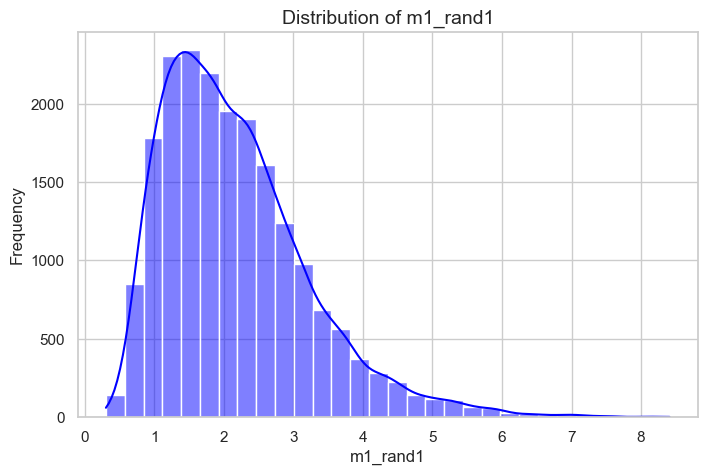

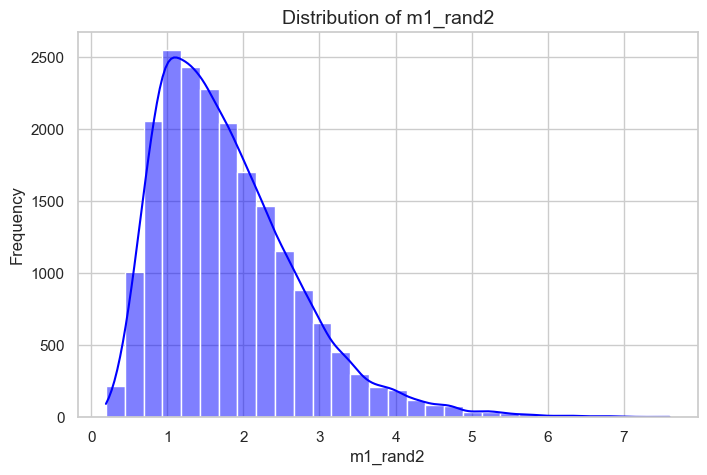

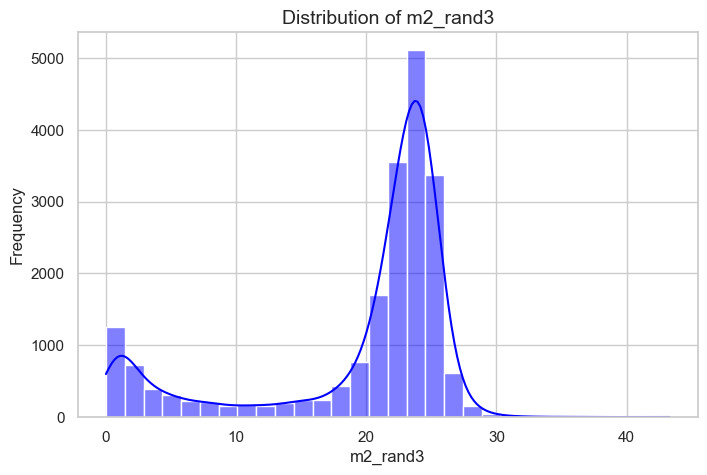

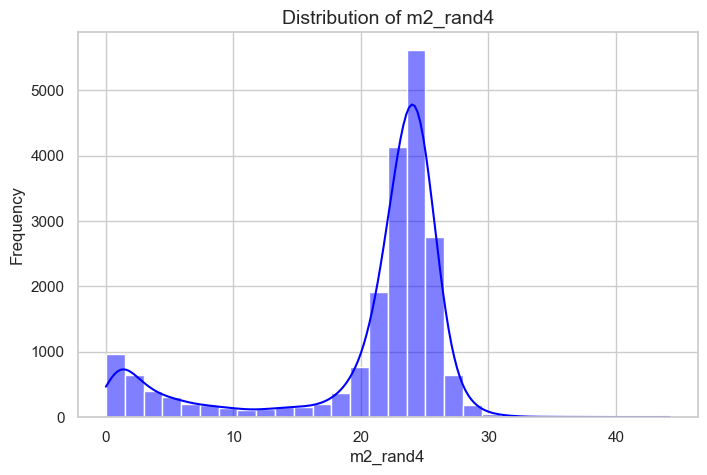

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df2 = pd.read_csv('../data/preprocessed_dataset.csv')




# List of features
#features = ['m2/m1 at the core', 'm2/m1 at the edge', 'random m2/m1']
features = ['m1_rand1', 'm1_rand2', 'm2_rand3', 'm2_rand4']

# Set plot style
sns.set(style='whitegrid')

# Plot distributions
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df2[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

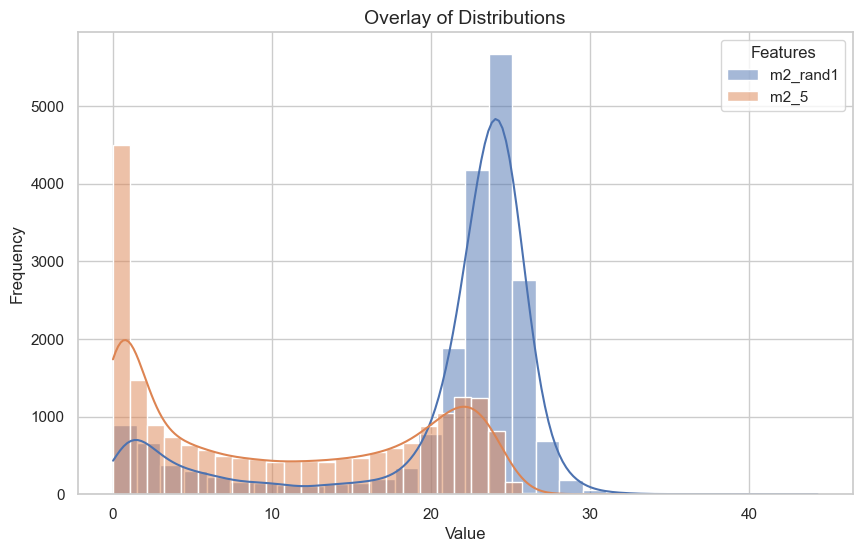

Kolmogorov-Smirnov Test: D=0.5620499999999999, p-value=0.0
Mann-Whitney U Test: U=335321257.0, p-value=0.0


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, mannwhitneyu

# Load the dataset
df2 = pd.read_csv('C:/Users/pejma/Nextcloud/PDE model/Final2/dataset_last3.csv')

# Features to compare
features = ['m2_rand1', 'm2_5']

# Set plot style
sns.set(style='whitegrid')

# Overlay histograms for visual comparison
plt.figure(figsize=(10, 6))
for feature in features:
    sns.histplot(df2[feature], kde=True, bins=30, label=feature, alpha=0.5)
plt.title('Overlay of Distributions', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Features')
plt.show()

# Perform statistical tests
feature1 = df2[features[0]].dropna()
feature2 = df2[features[1]].dropna()

# Kolmogorov-Smirnov Test
ks_stat, ks_p = ks_2samp(feature1, feature2)
print(f"Kolmogorov-Smirnov Test: D={ks_stat}, p-value={ks_p}")

# Mann-Whitney U Test
mw_stat, mw_p = mannwhitneyu(feature1, feature2)
print(f"Mann-Whitney U Test: U={mw_stat}, p-value={mw_p}")


In [7]:
Q1 = df2['IW'].quantile(0.25)

# Separate the dataset into two based on Q1
nodular = df2[df2['IW'] <= Q1]
infiltrative = df2[df2['IW'] > Q1]




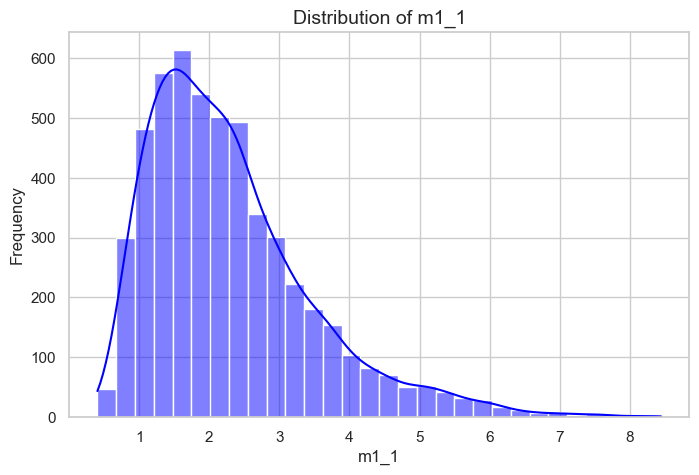

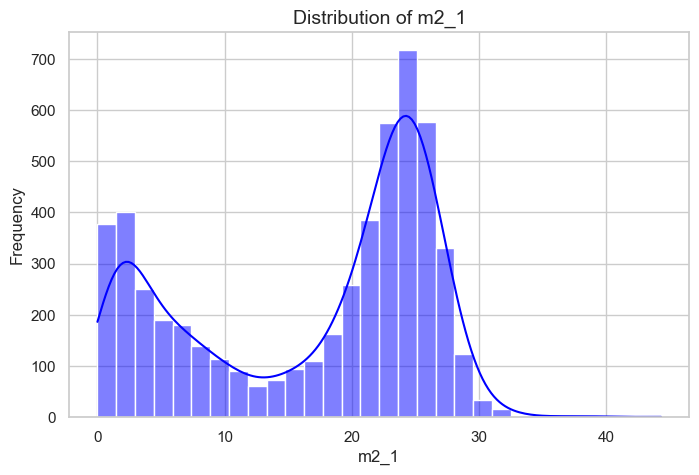

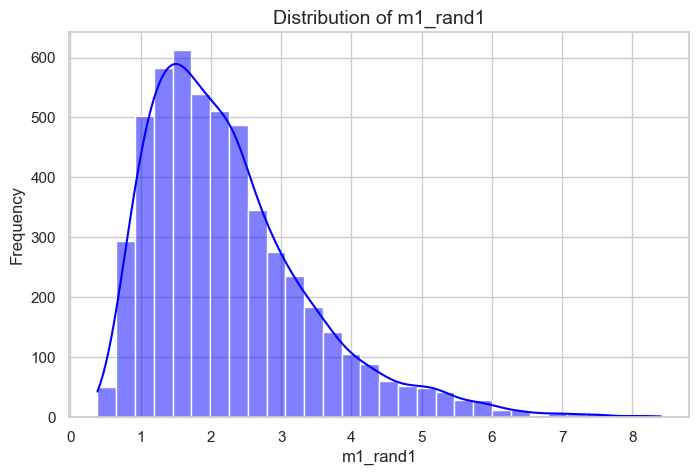

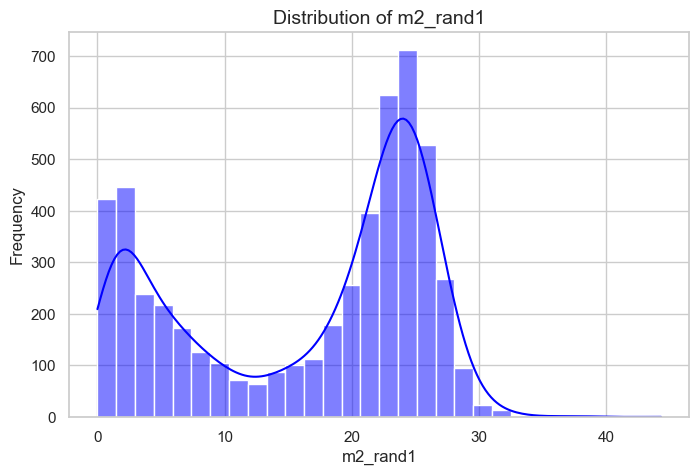

In [8]:
features = ['m1_1', 'm2_1', 'm1_rand1', 'm2_rand1']

# Set plot style
sns.set(style='whitegrid')

# Plot distributions
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(nodular[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()